In [3]:
from qiskit import QuantumCircuit
from qiskit import QuantumRegister
from qiskit import ClassicalRegister

q = QuantumCircuit(4, 4)
i = [0,1] #1
o = [1,0] #0
q.initialize(i, 0)
q.initialize(o, 1)
q.initialize(i, 2)
q.barrier()
q.x(0)
q.x(2)
q.barrier()
q.cx(0,1)
q.cx(0,2)
q.cx(0,3)
q.barrier()
q.x(0)
q.x(2)
q.barrier()
q.measure(0,0)
q.measure(1,1)
q.measure(2,2)
q.measure(3,3)
q.draw()

┌─────────────────┐ ░ ┌───┐ ░                 ░ ┌───┐ ░ ┌─┐         
q_0: ┤ initialize(0,1) ├─░─┤ X ├─░───■────■────■───░─┤ X ├─░─┤M├─────────
     ├─────────────────┤ ░ └───┘ ░ ┌─┴─┐  │    │   ░ └───┘ ░ └╥┘┌─┐      
q_1: ┤ initialize(1,0) ├─░───────░─┤ X ├──┼────┼───░───────░──╫─┤M├──────
     ├─────────────────┤ ░ ┌───┐ ░ └───┘┌─┴─┐  │   ░ ┌───┐ ░  ║ └╥┘┌─┐   
q_2: ┤ initialize(0,1) ├─░─┤ X ├─░──────┤ X ├──┼───░─┤ X ├─░──╫──╫─┤M├───
     └─────────────────┘ ░ └───┘ ░      └───┘┌─┴─┐ ░ └───┘ ░  ║  ║ └╥┘┌─┐
q_3: ────────────────────░───────░───────────┤ X ├─░───────░──╫──╫──╫─┤M├
                         ░       ░           └───┘ ░       ░  ║  ║  ║ └╥┘
c: 4/═════════════════════════════════════════════════════════╩══╩══╩══╩═
                                                              0  1  2  3

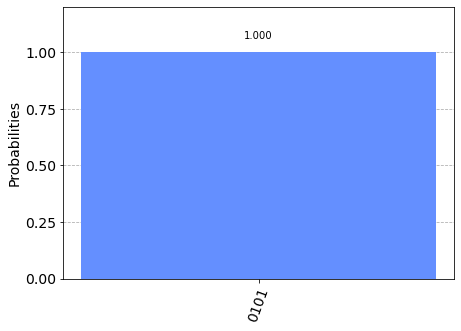

In [4]:
from qiskit.visualization import plot_histogram
from qiskit import Aer
from qiskit import assemble

ass = assemble(q, shots=1)
sim = Aer.get_backend('qasm_simulator')
res = sim.run(ass)
cnt = res.result().get_counts()
plot_histogram(cnt)